<a href="https://colab.research.google.com/github/arpitarumma/BigDataAnalytics/blob/main/BDAObesitypred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/BDA6THSEM/obesity_data.csv')
data[['Age','Height','Weight','BMI', 'PhysicalActivityLevel']]

,Age,Height,Weight,BMI,PhysicalActivityLevel
0,56,173.575262,71.982051,23.891783,4
1,69,164.127306,89.959256,33.395209,2
2,46,168.072202,72.930629,25.817737,4
3,32,168.459633,84.886912,29.912247,3
4,60,183.568568,69.038945,20.487903,3
...,...,...,...,...,...
995,18,155.588674,64.103182,26.480345,4
996,35,165.076490,97.639771,35.830783,1
997,49,156.570956,78.804284,32.146036,1
998,64,164.192222,57.978115,21.505965,4


<Axes: xlabel='Age', ylabel='Count'>

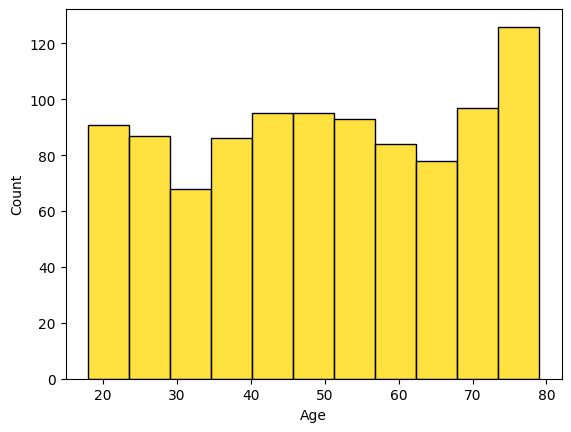

In [ ]:
sns.histplot(data.Age, color='gold')

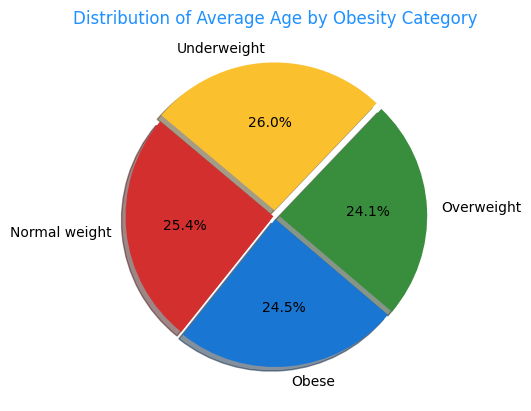

In [ ]:
data.groupby('ObesityCategory').Age.mean().plot.pie(
    autopct='%1.1f%%',
    explode=[0.01, 0.02, 0.03, 0.04],
    colors=['#d32f2f', '#1976d2', '#388e3c', '#fbc02d'],
    startangle=140,
    shadow=True,
)
plt.ylabel('')
plt.title('Distribution of Average Age by Obesity Category', color='#1e90ff')
plt.show()

In [ ]:
data.ObesityCategory.value_counts()


,count
ObesityCategory,
Normal weight,371
Overweight,295
Obese,191
Underweight,143


In [ ]:
X=data.drop(columns='ObesityCategory')
Y=data['ObesityCategory']
Y

,ObesityCategory
0,Normal weight
1,Obese
2,Overweight
3,Overweight
4,Normal weight
...,...
995,Overweight
996,Obese
997,Obese
998,Normal weight


In [ ]:
data.ObesityCategory.value_counts()

,count
ObesityCategory,
Normal weight,371
Overweight,295
Obese,191
Underweight,143


In [ ]:
data.Gender=data.Gender.map({'Male' : 1, 'Female' : 0})
data.ObesityCategory=data.ObesityCategory.map({'Normal weight':0, 'Overweight':1,'Obese':2,'Underweight':3})

In [ ]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
X=pd.DataFrame(X_scaler, columns=X.columns)
X

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel
0,0.339295,-0.955011,0.341864,0.050076,-0.160970,1.313943
1,1.057320,-0.955011,-0.574985,1.209739,1.374115,-0.478612
2,-0.213033,1.047108,-0.192164,0.111266,0.150129,1.313943
3,-0.986291,-0.955011,-0.154567,0.882535,0.811514,0.417665
4,0.560226,-0.955011,1.311635,-0.139776,-0.710797,0.417665
...,...,...,...,...,...,...
995,-1.759549,-0.955011,-1.403591,-0.458170,0.257160,1.313943
996,-0.820593,1.047108,-0.482874,1.705189,1.767533,-1.374890
997,-0.047334,1.047108,-1.308268,0.490161,1.172337,-1.374890
998,0.781156,-0.955011,-0.568685,-0.853282,-0.546350,1.313943


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=87)
model1=LogisticRegression()
model1.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
pred1=model1.predict(X_test)
accuracy_score(Y_test, pred1)


0.975

<Axes: >

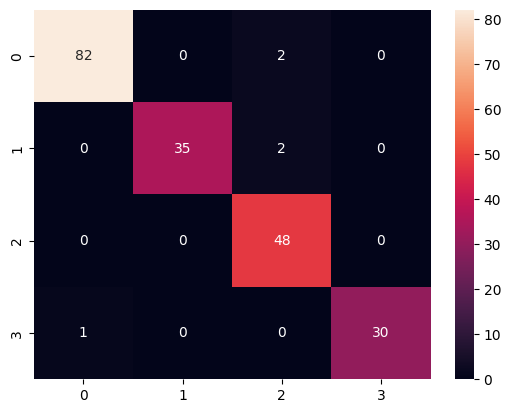

In [ ]:
sns.heatmap(confusion_matrix(Y_test, pred1), annot=True)

In [ ]:
print("Logidtic Regression")
print(classification_report(Y_test, pred1))

Logidtic Regression
               precision    recall  f1-score   support

Normal weight       0.99      0.98      0.98        84
        Obese       1.00      0.95      0.97        37
   Overweight       0.92      1.00      0.96        48
  Underweight       1.00      0.97      0.98        31

     accuracy                           0.97       200
    macro avg       0.98      0.97      0.97       200
 weighted avg       0.98      0.97      0.98       200

